In [1]:
from pygluon.reactors import GluonZReactor
from pygluon.reactors.types import (
    GluonReaction,
    GluonZReactorParameters,
    GluonZReactorState,
    Tokeons,
    GluonUserState
)
import matplotlib.pyplot as plt

### Beta-Decay Plus Test

##### Case 1: q* < q, q* <= q- < q (DEPEG)

In [235]:
# Initial parameters for the reactor.

params = GluonZReactorParameters(
    0.5,
    0.05,
    0.05,
    0.0,
    0.4,
    0.5
)

state = GluonZReactorState(
    10,
    10,
    10,
    0.0,
    0.0
)

reactor = GluonZReactor(params, state)

user_state = GluonUserState(
    0,
    0,
    5
)

n = user_state.neutrons / reactor.state.neutron_circulating_supply
p = user_state.protons / reactor.state.proton_circulating_supply
P = 1.2
qstar = reactor.parameters.critical_neutron_ratio
q = reactor.neutron_ratio(P)

print("normalized_neutron_balance: ", n)
print("normalized_proton_balance: ", p)
print("neutron_target_price: ", P)
print("q*: ", qstar)
print("q: ", q)

normalized_neutron_balance:  0.0
normalized_proton_balance:  0.5
neutron_target_price:  1.2
q*:  0.5
q:  1.2


In [236]:
# Beta-Decay Plus Test
# Case 1: q* < q, q* <= q- < q (DEPEG)

# Intermediate variables.
epsilon = q - qstar
M = 1
m = M / reactor.state.proton_circulating_supply
beta_plus_fee = reactor.parameters.beta_decay_fee_intercept

tau = 1 + epsilon
omega = (1-qstar)*p + q*n

print("epsilon: ", epsilon)
print("reaction_protons: ", M)
print("normalized_reaction_protons: ", m)
print("beta_plus_fee: ", beta_plus_fee)
print("tau: ", tau)
print("omega: ", omega)

# Test the tau lower bound - i.e. epsilon threshold.
tau_lower_bound = (omega*(1-m)) / (p-m) if (m < p) else 1_000_000 
print("tau_lower_bound: ", tau_lower_bound)
print("tau > tau_lower_bound: ", tau > tau_lower_bound)

# Test beta-plus fee bound.
beta_plus_bound = 1 - ((tau/(tau-omega))*((1-p)/(1-m)))
print("beta_plus_bound: ", beta_plus_bound)
print("beta_decay_plus_fee < beta_plus_bound: ", beta_plus_fee < beta_plus_bound)

# Test value preservation.
V = user_state.basecoins + user_state.neutrons*reactor.neutron_price(P) + user_state.protons*reactor.proton_price(P)
print("Initial value: ", V)

beta_decay_plus = reactor.execute(GluonReaction.BETA_DECAY_PLUS, M, P, 1)
qPrime = reactor.neutron_ratio(P)
Nprime = user_state.neutrons + beta_decay_plus.reactor_output
Pprime = user_state.protons - M
Vprime = user_state.basecoins + Nprime*reactor.neutron_price(P) + Pprime*reactor.proton_price(P)

print("PrimeNeutronRatio: ", qPrime)
print("PrimeNeutrons: ", Nprime)
print("PrimeProtons: ", Pprime)
print("Prime value: ", Vprime)
print("Value preserved: ", Vprime <= V)

epsilon:  0.7
reaction_protons:  1
normalized_reaction_protons:  0.1
beta_plus_fee:  0.4
tau:  1.7
omega:  0.25
tau_lower_bound:  0.5625
tau > tau_lower_bound:  True
beta_plus_bound:  0.3486590038314177
beta_decay_plus_fee < beta_plus_bound:  False
Initial value:  1.4705882352941173
PrimeNeutronRatio:  1.23
PrimeNeutrons:  0.24999999999999994
PrimeProtons:  4
Prime value:  1.457931920359666
Value preserved:  True


##### Case 2: q < q*, q < q+ < q* (PEG)

In [152]:
# Initial parameters for the reactor.

params = GluonZReactorParameters(
    0.99,
    0.05,
    0.05,
    0.0,
    0.25,
    0.5
)

state = GluonZReactorState(
    20,
    10,
    10,
    0.0,
    0.0
)

reactor = GluonZReactor(params, state)

user_state = GluonUserState(
    0,
    0,
    5
)

n = user_state.neutrons / reactor.state.neutron_circulating_supply
p = user_state.protons / reactor.state.proton_circulating_supply
P = 0.8
qstar = reactor.parameters.critical_neutron_ratio
q = reactor.neutron_ratio(P)

print("normalized_neutron_balance: ", n)
print("normalized_proton_balance: ", p)
print("neutron_target_price: ", P)
print("q*: ", qstar)
print("q: ", q)

normalized_neutron_balance:  0.0
normalized_proton_balance:  0.5
neutron_target_price:  0.8
q*:  0.99
q:  0.4


In [153]:
# Beta-Decay Plus Test
# Case 2: q < q*, q < q+ < q* (PEG)

# Intermediate variables.
epsilon = qstar - q
M = 1
m = M / reactor.state.proton_circulating_supply
beta_plus_fee = reactor.parameters.beta_decay_fee_intercept

print("epsilon: ", epsilon)
print("reaction_protons: ", M)
print("normalized_reaction_protons: ", m)
print("beta_plus_fee: ", beta_plus_fee)

# Test value preservation.
V = user_state.basecoins + user_state.neutrons*reactor.neutron_price(P) + user_state.protons*reactor.proton_price(P)
print("Initial value: ", V)

beta_decay_plus = reactor.execute(GluonReaction.BETA_DECAY_PLUS, M, P, 1)
qPrime = reactor.neutron_ratio(P)
Nprime = user_state.neutrons + beta_decay_plus.reactor_output
Pprime = user_state.protons - M
Vprime = user_state.basecoins + Nprime*reactor.neutron_price(P) + Pprime*reactor.proton_price(P)

print("PrimeNeutronRatio: ", qPrime)
print("PrimeNeutrons: ", Nprime)
print("PrimeProtons: ", Pprime)
print("Prime value: ", Vprime)
print("Value preserved: ", Vprime <= V)

epsilon:  0.59
reaction_protons:  1
normalized_reaction_protons:  0.1
beta_plus_fee:  0.25
Initial value:  6.0
PrimeNeutronRatio:  0.445
PrimeNeutrons:  1.1249999999999998
PrimeProtons:  4
Prime value:  5.833333333333332
Value preserved:  True


##### Case 3: q < q*, q+ >= q* > q (PEG -> DEPEG)

In [183]:
# Initial parameters for the reactor.

params = GluonZReactorParameters(
    0.51,
    0.05,
    0.05,
    0.0,
    0.4,
    0.5
)

state = GluonZReactorState(
    20,
    10,
    10,
    0.0,
    0.0
)

reactor = GluonZReactor(params, state)

user_state = GluonUserState(
    0,
    2,
    5
)

n = user_state.neutrons / reactor.state.neutron_circulating_supply
p = user_state.protons / reactor.state.proton_circulating_supply
P = 0.95
qstar = reactor.parameters.critical_neutron_ratio
q = reactor.neutron_ratio(P)

print("normalized_neutron_balance: ", n)
print("normalized_proton_balance: ", p)
print("neutron_target_price: ", P)
print("q*: ", qstar)
print("q: ", q)

normalized_neutron_balance:  0.2
normalized_proton_balance:  0.5
neutron_target_price:  0.95
q*:  0.51
q:  0.475


In [184]:
# Beta-Decay Plus Test
# Case 3: q < q*, q < q* <= q+ (PEG -> DEPEG)

# Intermediate variables.
M = 1
m = M / reactor.state.proton_circulating_supply
epsilon = qstar - q
print("reaction_protons: ", M)
print("normalized_reaction_protons: ", m)
print("epsilon: ", epsilon)

# Test epsilon upper bound.
epsilon_upper_bound = m*(1-q)
print("epsilon_upper_bound: ", epsilon_upper_bound)
print("epsilon < epsilon_upper_bound: ", epsilon < epsilon_upper_bound)

# Test beta plus fee upper bound.
beta_plus_fee = reactor.parameters.beta_decay_fee_intercept
beta_plus_fee_upper_bound = 1 - (epsilon / (m*(1-q)))
print("beta_plus_fee: ", beta_plus_fee)
print("beta_plus_fee_upper_bound: ", beta_plus_fee_upper_bound)
print("beta_plus_fee <= beta_plus_fee_upper_bound: ", beta_plus_fee <= beta_plus_fee_upper_bound)

# Test neutron ratio transition
alpha = q / (q + m*(1-beta_plus_fee)*(1-q))
new_neutron_ratio = q / alpha
epsilon_upper_bound_phi = m*(1-q)*(1-beta_plus_fee)
print("epsilon_upper_bound_phi: ", epsilon_upper_bound_phi)
print("alpha: ", alpha)
print("new_neutron_ratio: ", new_neutron_ratio)
print("new_neutron_ratio >= q*: ", new_neutron_ratio >= qstar)

# Test beta plus fee lower bound.
phi = (p-m) / (1-m)
omega = (q*n) + ((1-q)*p)
omega_star = (q*n) + ((1-qstar)*phi)
m_bar = m*(1-q)*(1-omega)
beta_plus_fee_lower_bound = 1 - ((omega*(1-epsilon) - omega_star) / m_bar)
print("beta_plus_fee_lower_bound: ", beta_plus_fee_lower_bound)
print("beta_plus_fee >= beta_plus_fee_lower_bound: ", beta_plus_fee >= beta_plus_fee_lower_bound)

# Test epsilon lower bound.
epsilon_lower_bound = ((omega-omega_star) - m_bar) / omega
print("epsilon_lower_bound: ", epsilon_lower_bound)
print("epsilon > epsilon_lower_bound: ", epsilon > epsilon_lower_bound)

# Test value preservation.
V = user_state.basecoins + user_state.neutrons*reactor.neutron_price(P) + user_state.protons*reactor.proton_price(P)
print("Initial value: ", V)

beta_decay_plus = reactor.execute(GluonReaction.BETA_DECAY_PLUS, M, P, 1)
qPrime = reactor.neutron_ratio(P)
Nprime = user_state.neutrons + beta_decay_plus.reactor_output
Pprime = user_state.protons - M
Vprime = user_state.basecoins + Nprime*reactor.neutron_price(P) + Pprime*reactor.proton_price(P)

print("PrimeNeutronRatio: ", qPrime)
print("PrimeNeutrons: ", Nprime)
print("PrimeProtons: ", Pprime)
print("Prime value: ", Vprime)
print("Value preserved: ", Vprime <= V)

reaction_protons:  1
normalized_reaction_protons:  0.1
epsilon:  0.03500000000000003
epsilon_upper_bound:  0.052500000000000005
epsilon < epsilon_upper_bound:  True
beta_plus_fee:  0.4
beta_plus_fee_upper_bound:  0.3333333333333328
beta_plus_fee <= beta_plus_fee_upper_bound:  False
epsilon_upper_bound_phi:  0.0315
alpha:  0.9378084896347483
new_neutron_ratio:  0.5065
new_neutron_ratio >= q*:  False
beta_plus_fee_lower_bound:  0.045107364173513353
beta_plus_fee >= beta_plus_fee_lower_bound:  True
epsilon_lower_bound:  0.030743978243978218
epsilon > epsilon_lower_bound:  True
Initial value:  7.15
PrimeNeutronRatio:  0.5065000000000001
PrimeNeutrons:  2.663157894736842
PrimeProtons:  4
Prime value:  6.916666666666666
Value preserved:  True


### Beta-Decay Minus Test

##### Case 1: q* < q, q* <= q- < q (DEPEG)

In [237]:
# Initial parameters for the reactor.

params = GluonZReactorParameters(
    0.5,
    0.05,
    0.05,
    0.0,
    0.1,
    0.5
)

state = GluonZReactorState(
    20,
    10,
    10,
    0.0,
    0.0
)

reactor = GluonZReactor(params, state)

user_state = GluonUserState(
    0,
    5,
    0
)

n = user_state.neutrons / reactor.state.neutron_circulating_supply
p = user_state.protons / reactor.state.proton_circulating_supply
P = 1.2
qstar = reactor.parameters.critical_neutron_ratio
q = reactor.neutron_ratio(P)

print("normalized_neutron_balance: ", n)
print("normalized_proton_balance: ", p)
print("neutron_target_price: ", P)
print("q*: ", qstar)
print("q: ", q)

normalized_neutron_balance:  0.5
normalized_proton_balance:  0.0
neutron_target_price:  1.2
q*:  0.5
q:  0.6


In [238]:
# Beta-Decay Minus Test
# Case 1: q* < q, q* <= q- < q (DEPEG)

# Intermediate variables.
M = 5
m = M / reactor.state.neutron_circulating_supply

epsilon = q - qstar

tau = 1 + epsilon
omega = (1-qstar)*p + q*n

tau_bar = (1-qstar) + q*m
omega_bar = (1-qstar)*p + q*m

beta_minus_fee = reactor.parameters.beta_decay_fee_intercept

print("reaction_neutrons: ", M)
print("normalized_reaction_neutrons: ", m)
print("epsilon: ", epsilon)
print("tau: ", tau)
print("omega: ", omega)
print("tau_bar: ", tau_bar)
print("omega_bar: ", omega_bar)
print("beta_minus_fee: ", beta_minus_fee)

# Test the tau upper bound - i.e. epsilon threshold.
tau_upper_bound = (tau_bar / omega_bar) * omega
print("tau_upper_bound: ", tau_upper_bound)
print("tau < tau_upper_bound: ", tau < tau_upper_bound)

# Test beta-minus fee bound.
beta_minus_bound = 1 - (((1-qstar)*(tau-omega))/((tau*(1-qstar)*(1-p))-((tau-omega)*q*m)))
print("beta_minus_bound: ", beta_minus_bound)
print("beta_decay_minus_fee < beta_minus_bound: ", beta_minus_fee < beta_minus_bound)

# Test value preservation.
V = user_state.basecoins + user_state.neutrons*reactor.neutron_price(P) + user_state.protons*reactor.proton_price(P)
print("Initial value: ", V)

beta_decay_minus = reactor.execute(GluonReaction.BETA_DECAY_MINUS, M, P, 1)
Pprime = user_state.protons + beta_decay_minus.reactor_output
Nprime = user_state.neutrons - M
Vprime = user_state.basecoins + Nprime*reactor.neutron_price(P) + Pprime*reactor.proton_price(P)

print("PrimeNeutrons: ", Nprime)
print("PrimeProtons: ", Pprime)
print("Prime value: ", Vprime)
print("Value preserved: ", Vprime <= V)


reaction_neutrons:  5
normalized_reaction_neutrons:  0.5
epsilon:  0.09999999999999998
tau:  1.1
omega:  0.3
tau_bar:  0.8
omega_bar:  0.3
beta_minus_fee:  0.1
tau_upper_bound:  0.8
tau < tau_upper_bound:  False
beta_minus_bound:  -0.29032258064516103
beta_decay_minus_fee < beta_minus_bound:  False
Initial value:  5.454545454545454
PrimeNeutrons:  0
PrimeProtons:  5.399999999999999
Prime value:  4.909090909090908
Value preserved:  True


### Leverage Analysis

In [77]:
# Normalized Reserve/Neutron Ratio
def normalized_neutron_ratio(critical_neutron_ratio: float, neutron_ratio: float) -> float:
    if (neutron_ratio < critical_neutron_ratio):
        return neutron_ratio
    else:
        epsilon = neutron_ratio - critical_neutron_ratio
        return neutron_ratio / (1 + epsilon)
    
def normalized_reserve_ratio(critical_reserve_ratio: float, reserve_ratio: float) -> float:
    if (reserve_ratio > critical_reserve_ratio):
        return reserve_ratio
    else:
        return (1 + reserve_ratio - (reserve_ratio / critical_reserve_ratio))
    

In [78]:
# Proton Leverage Function
def proton_leverage_rr(normalized_reserve_ratio: float) -> float:
    return 1 / (normalized_reserve_ratio - 1)

def proton_leverage_nr(normalized_neutron_ratio: float) -> float:
    # debt / equity
    return normalized_neutron_ratio / (1-normalized_neutron_ratio)

In [242]:
# Neutron Leverage Function
def neutron_leverage_rr(normalized_reserve_ratio: float) -> float:
    return (normalized_reserve_ratio - 1)

def neutron_leverage_nr(normalized_neutron_ratio: float) -> float:
    return (1-normalized_neutron_ratio) / normalized_neutron_ratio

In [111]:
rstar = [1.01, 1.5]
#qstar = 1/rstar

reserve_ratios = [i * 0.01 for i in range(50, 200)]
neutron_ratios = [i * 0.01 for i in range(50, 200)]

# Create list of lists: normalized reserve ratios for each critical reserve ratio
norms_rr = [[normalized_reserve_ratio(i, j) for j in reserve_ratios] for i in rstar]
#norms_nr = [normalized_neutron_ratio(qstar, i) for i in neutron_ratios]

proton_leverages_rr = [[proton_leverage_rr(i) for i in norms] for norms in norms_rr]
#proton_leverages_nr = [proton_leverage_nr(i) for i in norms_nr]

#neutron_leverages_rr = [neutron_leverage_rr(i) for i in norms_rr]
#neutron_leverages_nr = [neutron_leverage_nr(i) for i in norms_nr]

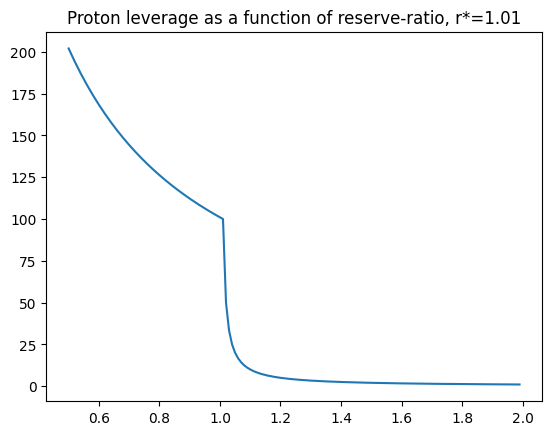

In [114]:
# Proton leverage plot
plt.plot(reserve_ratios, proton_leverages_rr[0])

plt.title("Proton leverage as a function of reserve-ratio, r*=1.01")
#plt.savefig("proton-leverage.png")
plt.show()

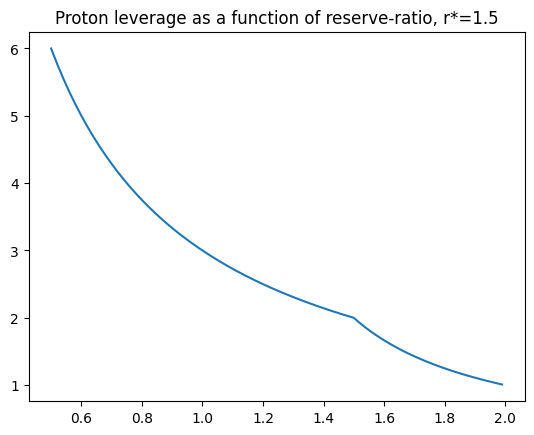

In [115]:
# Proton leverage plot
plt.plot(reserve_ratios, proton_leverages_rr[1])

plt.title("Proton leverage as a function of reserve-ratio, r*=1.5")
#plt.savefig("proton-leverage.png")
plt.show()

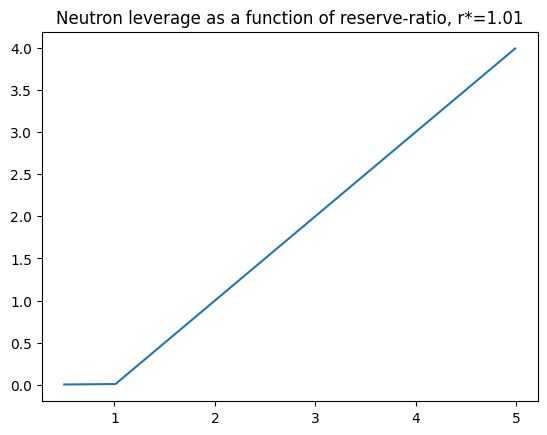

In [291]:
# Neutron leverage plot

plt.plot(reserve_ratios, neutron_leverages_rr)
#plt.plot(neutron_ratios, neutron_leverages_nr)
plt.title("Neutron leverage as a function of reserve-ratio, r*=1.01")
#plt.savefig("neutron-leverage.png")
plt.show()